<a href="https://colab.research.google.com/github/Anmol-Arora2309/tesla-stock-price-prediction-facebook-prophet/blob/main/Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Importing all required libraries
2. Importing the Yahoo Finance dataset
3. Utilizing Plotly express for data visualisation
4. Preparing Data for Modeling
5. Creating Facebook Prophet Model
6. Forecasting Stocks data for next 30 days
7. Downlaoding the predicted data

# Importing all required libraries

In [7]:
# Necessary libraries: pandas, prophet, plotly
import pandas as pd
import plotly.express as px
from prophet import Prophet

In [1]:
# Initializing Plotly
import plotly.io as pio
pio.renderers.deafult='colab'

# Data Gathering

In [8]:
stock_data_df= pd.read_csv('/content/TSLA.csv')

In [9]:
stock_data_df['Date'] = pd.to_datetime(stock_data_df['Date'])
start_date = '2019-01-01'
end_date = '2020-01-01'
filtered_data = stock_data_df[(stock_data_df['Date'] >= start_date) & (stock_data_df['Date'] <= end_date)]
print(filtered_data)

           Date       Open       High        Low      Close  Adj Close  \
2140 2019-01-02  61.220001  63.026001  59.759998  62.023998  62.023998   
2141 2019-01-03  61.400002  61.880001  59.476002  60.071999  60.071999   
2142 2019-01-04  61.200001  63.599998  60.546001  63.537998  63.537998   
2143 2019-01-07  64.344002  67.348000  63.549999  66.991997  66.991997   
2144 2019-01-08  68.391998  68.802002  65.403999  67.070000  67.070000   
...         ...        ...        ...        ...        ...        ...   
2387 2019-12-24  83.671997  85.094002  82.538002  85.050003  85.050003   
2388 2019-12-26  85.582001  86.695999  85.269997  86.188004  86.188004   
2389 2019-12-27  87.000000  87.061996  85.222000  86.075996  86.075996   
2390 2019-12-30  85.758003  85.800003  81.851997  82.940002  82.940002   
2391 2019-12-31  81.000000  84.258003  80.416000  83.666000  83.666000   

        Volume  
2140  58293000  
2141  34826000  
2142  36970500  
2143  37756000  
2144  35042500  
...      

In [10]:
# Save the filtered data to a new CSV file (optional)
filtered_data.to_csv('filtered_stock_data_2019.csv', index=False)

In [11]:
stock_data_df=pd.read_csv('filtered_stock_data_2019.csv')

In [12]:
stock_data_df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-02,61.220001,63.026001,59.759998,62.023998,62.023998,58293000
1,2019-01-03,61.400002,61.880001,59.476002,60.071999,60.071999,34826000
2,2019-01-04,61.200001,63.599998,60.546001,63.537998,63.537998,36970500
3,2019-01-07,64.344002,67.348000,63.549999,66.991997,66.991997,37756000
4,2019-01-08,68.391998,68.802002,65.403999,67.070000,67.070000,35042500
...,...,...,...,...,...,...,...
247,2019-12-24,83.671997,85.094002,82.538002,85.050003,85.050003,40273500
248,2019-12-26,85.582001,86.695999,85.269997,86.188004,86.188004,53169500
249,2019-12-27,87.000000,87.061996,85.222000,86.075996,86.075996,49728500
250,2019-12-30,85.758003,85.800003,81.851997,82.940002,82.940002,62932000


In [13]:
stock_data_df['Date'].min()

'2019-01-02'

In [14]:
stock_data_df['Date'].max()

'2019-12-31'

In [15]:
stock_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       252 non-null    object 
 1   Open       252 non-null    float64
 2   High       252 non-null    float64
 3   Low        252 non-null    float64
 4   Close      252 non-null    float64
 5   Adj Close  252 non-null    float64
 6   Volume     252 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


In [16]:
stock_data_df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,54.605627,55.529960,53.722508,54.706040,54.706040,4.579461e+07
std,10.469095,10.639957,10.412554,10.606053,10.606053,2.382350e+07
min,36.220001,37.335999,35.397999,35.793999,35.793999,1.232800e+07
25%,46.246501,46.954001,45.502499,46.444001,46.444001,3.028275e+07
50%,51.986000,52.796002,51.267001,52.059000,52.059000,3.872175e+07
75%,61.630001,63.230000,60.624999,62.382000,62.382000,5.325762e+07
max,87.000000,87.061996,85.269997,86.188004,86.188004,1.500305e+08


# Data Visualization using plotly express

In [17]:
px.area(stock_data_df, x='Date', y='Close') # Here, 'Close' denotes the price of the stocks

In [18]:
px.line(stock_data_df, x='Date', y='Close')

In [19]:

# This is the daily transactional volumne of data
px.area(stock_data_df, x='Date', y='Volume')

In [20]:
px.bar(stock_data_df, y='Volume', color_discrete_sequence=['red'])

In [21]:
# To analyze statistical data ( We dont need to specify x axis everytime)
px.box(stock_data_df, y='Close')

# Data preparation

In [22]:
stock_data_df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-02,61.220001,63.026001,59.759998,62.023998,62.023998,58293000
1,2019-01-03,61.400002,61.880001,59.476002,60.071999,60.071999,34826000
2,2019-01-04,61.200001,63.599998,60.546001,63.537998,63.537998,36970500
3,2019-01-07,64.344002,67.348000,63.549999,66.991997,66.991997,37756000
4,2019-01-08,68.391998,68.802002,65.403999,67.070000,67.070000,35042500
...,...,...,...,...,...,...,...
247,2019-12-24,83.671997,85.094002,82.538002,85.050003,85.050003,40273500
248,2019-12-26,85.582001,86.695999,85.269997,86.188004,86.188004,53169500
249,2019-12-27,87.000000,87.061996,85.222000,86.075996,86.075996,49728500
250,2019-12-30,85.758003,85.800003,81.851997,82.940002,82.940002,62932000


In [23]:
# Creating new df with date and price column (Close is the Price and it is y , whereas, x is date)
columns= ['Date', 'Close']
new_stock_data_df= pd.DataFrame(stock_data_df, columns=columns)
new_stock_data_df

,Date,Close
0,2019-01-02,62.023998
1,2019-01-03,60.071999
2,2019-01-04,63.537998
3,2019-01-07,66.991997
4,2019-01-08,67.070000
...,...,...
247,2019-12-24,85.050003
248,2019-12-26,86.188004
249,2019-12-27,86.075996
250,2019-12-30,82.940002


In [24]:
# Renaming dataframe columns as per the requirement of Facebook Prophet model
prophet_df = new_stock_data_df.rename(columns={'Date': 'ds', 'Close':'y'})
prophet_df

,ds,y
0,2019-01-02,62.023998
1,2019-01-03,60.071999
2,2019-01-04,63.537998
3,2019-01-07,66.991997
4,2019-01-08,67.070000
...,...,...
247,2019-12-24,85.050003
248,2019-12-26,86.188004
249,2019-12-27,86.075996
250,2019-12-30,82.940002


# Creating Facebook Prophet Model

In [25]:
# Initializing and fitting prophet model
model = Prophet()
model.fit(prophet_df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpj9yxgcgu/g0783st_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpj9yxgcgu/6qocv_hl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=98082', 'data', 'file=/tmp/tmpj9yxgcgu/g0783st_.json', 'init=/tmp/tmpj9yxgcgu/6qocv_hl.json', 'output', 'file=/tmp/tmpj9yxgcgu/prophet_modelujmactnf/prophet_model-20250111162542.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:25:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:25:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


# Model Prediction and Forecasting

In [26]:
# Here model will forecast for 1 month
future_data_prediction= model.make_future_dataframe(periods= 30)
forecast=model.predict(future_data_prediction)

In [27]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-01-02,66.263837,63.084164,71.423055,66.263837,66.263837,0.836067,0.836067,0.836067,0.836067,0.836067,0.836067,0.0,0.0,0.0,67.099904
1,2019-01-03,66.108204,62.952650,70.995668,66.108204,66.108204,1.011389,1.011389,1.011389,1.011389,1.011389,1.011389,0.0,0.0,0.0,67.119593
2,2019-01-04,65.952571,62.138097,70.701228,65.952571,65.952571,0.594117,0.594117,0.594117,0.594117,0.594117,0.594117,0.0,0.0,0.0,66.546688
3,2019-01-07,65.485672,62.188379,71.017949,65.485672,65.485672,1.033268,1.033268,1.033268,1.033268,1.033268,1.033268,0.0,0.0,0.0,66.518940
4,2019-01-08,65.330039,62.071782,70.557806,65.330039,65.330039,0.915032,0.915032,0.915032,0.915032,0.915032,0.915032,0.0,0.0,0.0,66.245071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,2020-01-26,90.864573,84.298738,92.918058,90.220890,91.498882,-2.194939,-2.194939,-2.194939,-2.194939,-2.194939,-2.194939,0.0,0.0,0.0,88.669634
278,2020-01-27,91.232423,88.182801,96.537208,90.554939,91.895287,1.033268,1.033268,1.033268,1.033268,1.033268,1.033268,0.0,0.0,0.0,92.265691
279,2020-01-28,91.600274,88.301496,96.777788,90.875620,92.297251,0.915032,0.915032,0.915032,0.915032,0.915032,0.915032,0.0,0.0,0.0,92.515306
280,2020-01-29,91.968124,88.468694,97.054941,91.177942,92.712626,0.836067,0.836067,0.836067,0.836067,0.836067,0.836067,0.0,0.0,0.0,92.804192


In [28]:
px.line(forecast, x='ds', y='yhat')

In [34]:
import pandas as pd
import plotly.express as px

stock_data = pd.read_csv('/content/TSLA.csv')
forecast = pd.read_csv('/content/TESLA_stock_forecast.csv')

# Date columns to datetime format
stock_data['Date'] = pd.to_datetime(stock_data['Date'])
forecast['ds'] = pd.to_datetime(forecast['ds'])

# Set the Date column as the index for easier filtering
stock_data.set_index('Date', inplace=True)

# Filter stock price data for the range 1-1-2020 to 1-1-2021 + 30 days using .loc
filtered_stock_data = stock_data.loc['2019-01-01':'2020-01-31'].reset_index()

filtered_stock_data['Type'] = 'Actual'
forecast['Type'] = 'Predicted'

filtered_stock_data = filtered_stock_data.rename(columns={'Date': 'ds', 'Close': 'y'})
forecast = forecast.rename(columns={'yhat': 'y'})

# Combined both datasets for plotting
combined_data = pd.concat([filtered_stock_data[['ds', 'y', 'Type']], forecast[['ds', 'y', 'Type']]])

# Combined data using plotly.express
fig = px.line(combined_data, x='ds', y='y', color='Type', title='Stock Price vs Forecast')
fig.update_layout(xaxis_title='Date', yaxis_title='Stock Price')
fig.show()

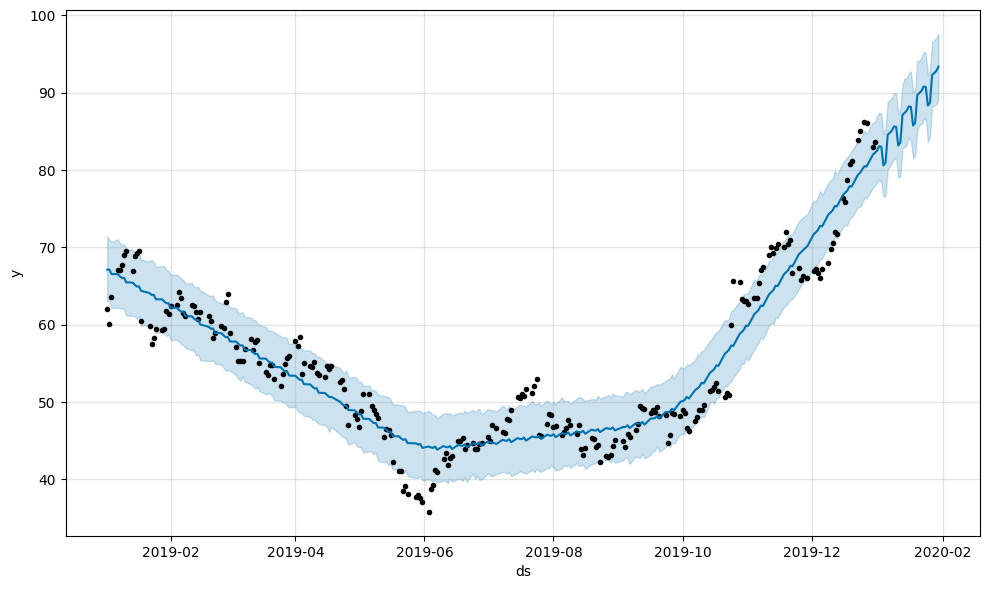

In [31]:
figure=model.plot(forecast,xlabel='ds', ylabel='y')
# Here black dots is the actual price of tesla and blue is the forecasted price

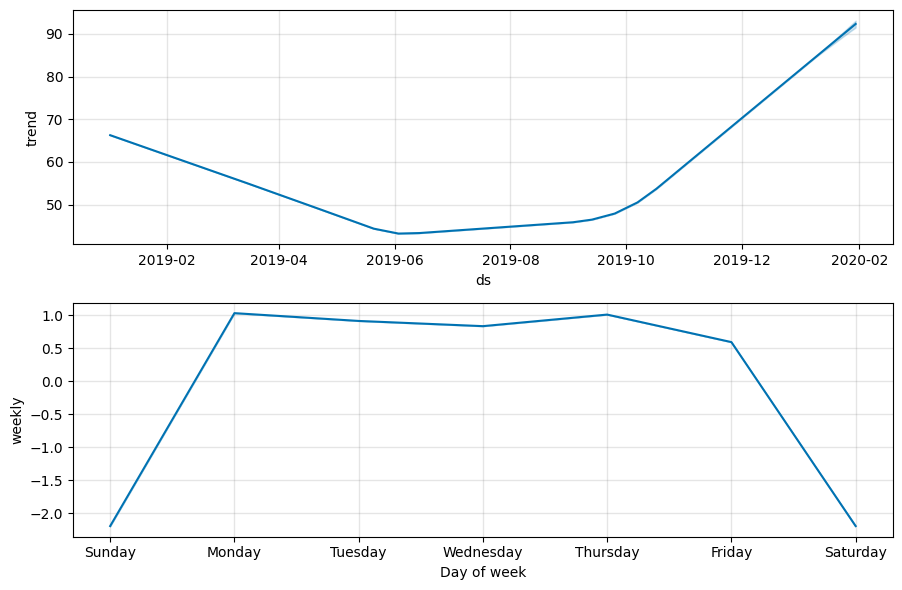

In [32]:
# Plotting weekly trend and overall trend
figure2=model.plot_components(forecast)

# Downloading the Forecast data

In [33]:
# To download the forecasted file directly
from google.colab import files
forecast.to_csv("TESLA_stock_forecast.csv")
files.download('TESLA_stock_forecast.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>